# TASK 7 - Stock Market Prediction using Numerical and Textual Analysis

### Author - Abhishek Tope

In [30]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [31]:

# For time stamps
from datetime import datetime

In [23]:
# Load the first dataset
columns=['Date','Category','News']

dataset = pd.read_csv("india-news-headlines.csv",names=columns)

In [32]:
# Load the first dataset
columns=['Date','Category','News']
ndf = pd.read_csv("india-news-headlines.csv",names=columns)

In [9]:
ndf.drop(0, inplace=True)
ndf.drop('Category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
ndf.head(-5)

Showing part of the whole dataset:


,Date,News
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa
6,20010102,Extra buses to clear tourist traffic
7,20010102,Dilute the power of transfers; says Riberio
8,20010102,Focus shifts to teaching of Hindi
9,20010102,IT will become compulsory in schools
10,20010102,Move to stop freedom fighters' pension flayed


In [33]:
print('Showing part of the whole dataset:')
ndf.head(5)

Showing part of the whole dataset:


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?


In [34]:
ndf.drop(0, inplace=True)
ndf.drop('Category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
ndf.head(-5)


Showing part of the whole dataset:


,Date,News
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa
6,20010102,Extra buses to clear tourist traffic
7,20010102,Dilute the power of transfers; says Riberio
8,20010102,Focus shifts to teaching of Hindi
9,20010102,IT will become compulsory in schools
10,20010102,Move to stop freedom fighters' pension flayed


In [36]:
# Load the second dataset
hisdf = pd.read_csv("^BSESN.csv")
hisdf.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
1,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0
2,2019-12-24,41684.511719,41702.980469,41423.070313,41461.261719,41461.261719,4400.0
3,2019-12-26,41543.800781,41543.800781,41132.890625,41163.761719,41163.761719,5600.0
4,2019-12-27,41297.078125,41611.269531,41264.921875,41575.140625,41575.140625,6100.0
5,2019-12-30,41686.269531,41714.730469,41453.378906,41558.000000,41558.000000,5700.0
6,2019-12-31,41607.488281,41607.488281,41184.730469,41253.738281,41253.738281,5600.0
7,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-01-02,41340.269531,41649.289063,41328.449219,41626.640625,41626.640625,5300.0
9,2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0


# Common Dataset Exploration

In [37]:
# Check for common information of the first datast
ndf["Date"] = pd.to_datetime(ndf["Date"],format='%Y%m%d')
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
Date    datetime64[ns]
News    object
dtypes: datetime64[ns](1), object(1)
memory usage: 75.5+ MB


In [38]:
# Group the headlines for each day
ndf['News'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
ndf = ndf.drop_duplicates() 
ndf.reset_index(inplace=True,drop=True)

In [39]:
ndf

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
5,2001-01-06,Light combat craft takes India into club class...
6,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...
7,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...
8,2001-01-09,Financier Bharat Shah held for alleged links w...
9,2001-01-10,Fend for yourselves; Pande tells doctors Burea...


In [40]:
# Check for any duplicated values
ndf.isnull().sum()

Date    0
News    0
dtype: int64

In [41]:
len(ndf)

7080

In [42]:
hisdf=hisdf[["Date","Open","High","Low","Close","Volume"]]
hisdf.head(-5)

,Date,Open,High,Low,Close,Volume
0,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,33600.0
1,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,6200.0
2,2019-12-24,41684.511719,41702.980469,41423.070313,41461.261719,4400.0
3,2019-12-26,41543.800781,41543.800781,41132.890625,41163.761719,5600.0
4,2019-12-27,41297.078125,41611.269531,41264.921875,41575.140625,6100.0
5,2019-12-30,41686.269531,41714.730469,41453.378906,41558.000000,5700.0
6,2019-12-31,41607.488281,41607.488281,41184.730469,41253.738281,5600.0
7,2020-01-01,NaN,NaN,NaN,NaN,NaN
8,2020-01-02,41340.269531,41649.289063,41328.449219,41626.640625,5300.0
9,2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,8900.0


In [43]:
# Check for common information of the second dataset
hisdf["Date"]= pd.to_datetime(hisdf["Date"])
hisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
Date      250 non-null datetime64[ns]
Open      248 non-null float64
High      248 non-null float64
Low       248 non-null float64
Close     248 non-null float64
Volume    248 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.8 KB


In [44]:
hisdf.describe()

,Open,High,Low,Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,37798.461426,38064.863014,37413.375039,37736.853051,19100.403226
std,4547.193479,4418.521014,4683.381677,4572.226707,16539.924702
min,26499.810547,27462.869141,25638.900391,25981.240234,4400.000000
25%,34305.207031,34699.283203,33955.879883,34237.300781,13075.000000
50%,38476.410157,38742.685547,38217.509765,38413.355469,16850.000000
75%,41170.886719,41360.597656,40909.855469,41070.613281,20925.000000
max,47026.019531,47026.019531,46630.308594,46960.691406,188300.000000


In [45]:
# Check for duplicated values
hisdf.isnull().sum()

Date      0
Open      2
High      2
Low       2
Close     2
Volume    2
dtype: int64

Text(0, 0.5, 'BSESN')

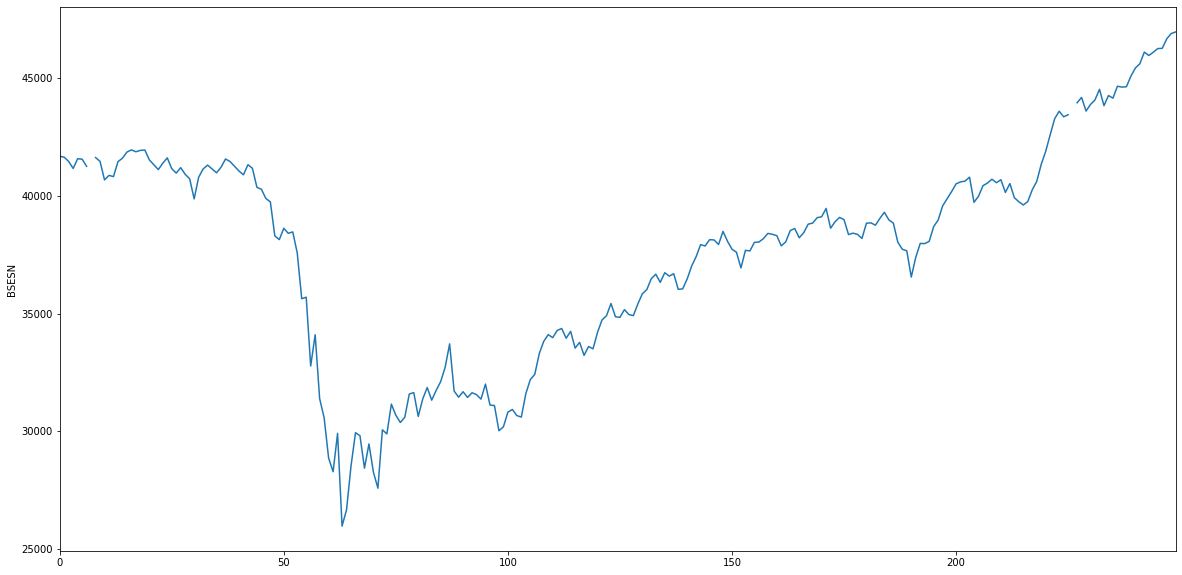

In [46]:
# Figure plot
plt.figure(figsize=(20,10))
hisdf['Close'].plot()
plt.ylabel('BSESN')

## Remove Unwanted Characters from the News

In [47]:
#removing unwanted characters from the News
ndf.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
ndf["News"].head(5)

0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya  s...
2    Powerless north India gropes in the dark Think...
3    The string that pulled Stephen Hawking to Indi...
4    Light combat craft takes India into club class...
Name: News, dtype: object

# Historical Analysis
Plot the Moving Average

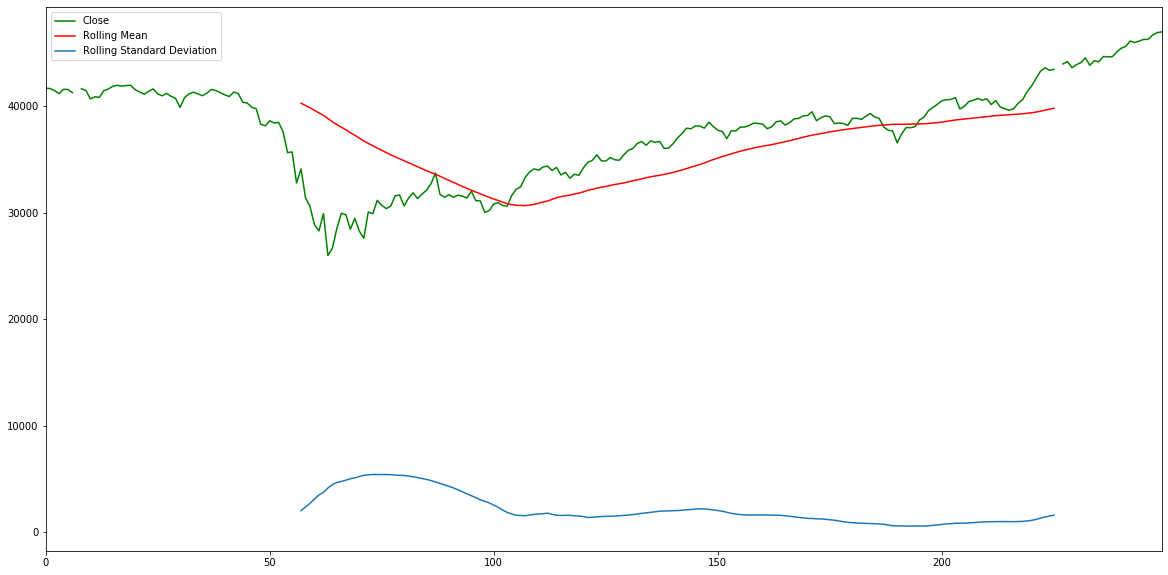

In [48]:
#Plotting moving average
close = hisdf['Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
hisdf['Close'].plot(color='g',label='Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()

Text(0.5, 1.0, 'Returns')

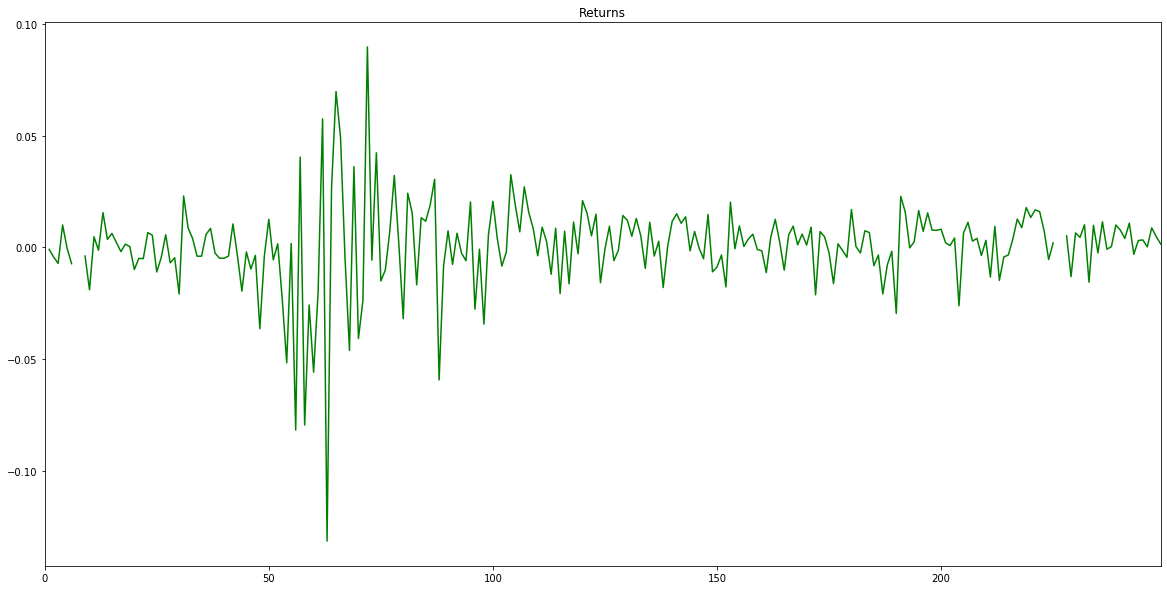

In [49]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [50]:
# Train test split
train = hisdf[:1219]
test = hisdf[1219:]

# Rolling mean and Standard Deviation

In [53]:
#Stationarity test
def test_stationarity(timeseries):

 #Determine the rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (20,10))
 plt.plot(timeseries, color = 'blue', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'black', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 30)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")


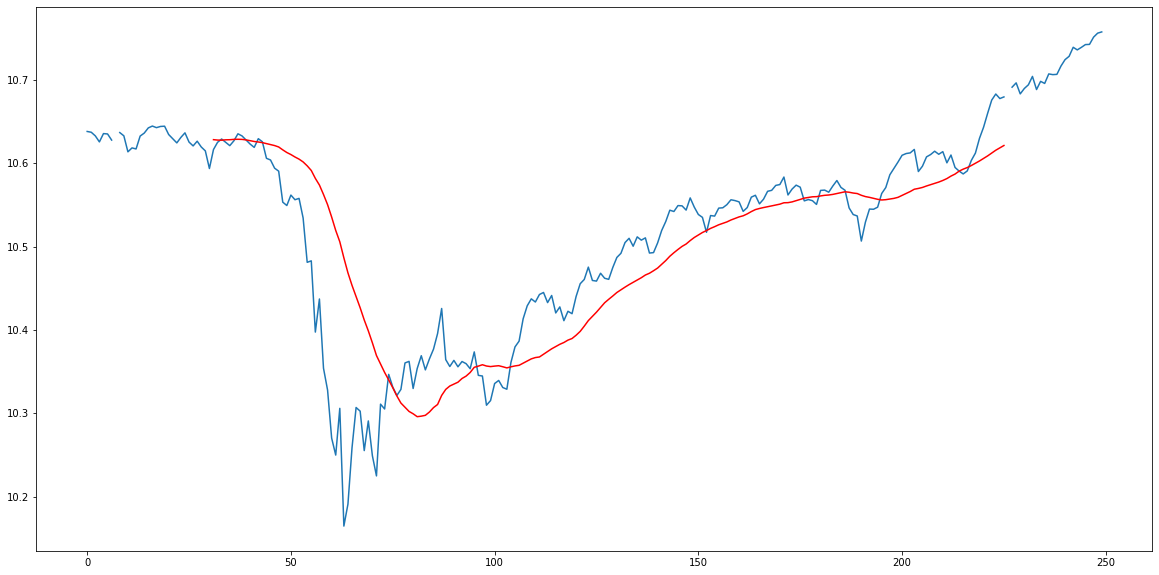

In [52]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (20,10))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

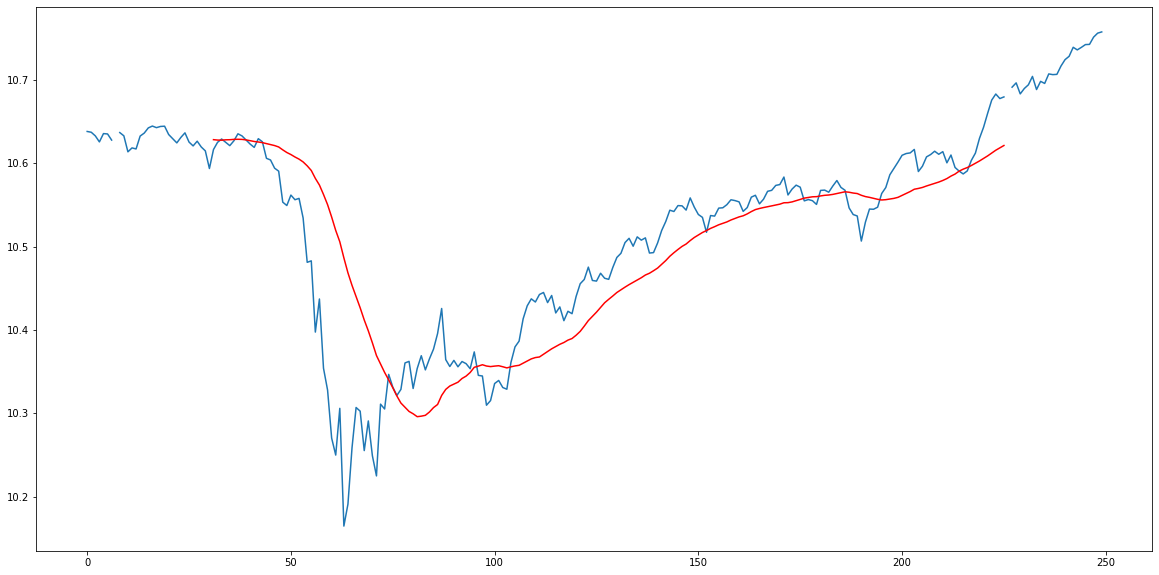

In [54]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (20,10))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

In [63]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity


In [67]:
df_merge = pd.merge(hisdf, ndf, how='inner', on='Date')
df_merge


,Date,Open,High,Low,Close,Volume,News
0,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,33600.0,I'm done playing the good girl I want to be a...
1,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,6200.0,Weekly Horoscope December Check predic...
2,2019-12-24,41684.511719,41702.980469,41423.070313,41461.261719,4400.0,Choker necklaces make for some sassy throwback...
3,2019-12-26,41543.800781,41543.800781,41132.890625,41163.761719,5600.0,NIT T develops cold storage system for storing...
4,2019-12-27,41297.078125,41611.269531,41264.921875,41575.140625,6100.0,All schools in Naintial to be closed for two d...
5,2019-12-30,41686.269531,41714.730469,41453.378906,41558.000000,5700.0,Kareena Kapoor is holidaying in Switzerland an...
6,2019-12-31,41607.488281,41607.488281,41184.730469,41253.738281,5600.0,herbal weight loss supplements to help you get...
7,2020-01-01,NaN,NaN,NaN,NaN,NaN,Happy New Year Images Quotes Wishes M...
8,2020-01-02,41340.269531,41649.289063,41328.449219,41626.640625,5300.0,Horoscope Today January Read predict...
9,2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,8900.0,Bank Holidays in Mazya Navryachi Bayko up...


# Conclusion

RandomForest = 0.05257968397499098
DecisionTree = 0.10831900809236311
AdaBoost = 0.05492347045438241
LightGBM = 0.0583079056070462
XGBoost = 0.05968830860645931 From here we can see that RandomForestRegressor shows a better performance than the others